In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as ltb
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv("/content/drive/MyDrive/ML Projects/Quora Question pair/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/ML Projects/Quora Question pair/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/ML Projects/Quora Question pair/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/ML Projects/Quora Question pair/y_test.csv")

In [3]:
X_train.drop(["Unnamed: 0"], axis = 1, inplace = True)
X_test.drop(["Unnamed: 0"], axis = 1, inplace = True)

y_train.drop(["Unnamed: 0"], axis = 1, inplace = True)
y_test.drop(["Unnamed: 0"], axis = 1, inplace = True)

# Balancing through Class weights:

In [10]:
classes = np.unique(y_train)
cw = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train['is_duplicate'])
weights = dict(zip(classes,cw))

In [11]:
weights

{0: 0.7926443125395184, 1: 1.3542793735868017}

#Logistic Regression:

In [ ]:
lr = LogisticRegression(C = 0.01)
lr.fit(X_train, y_train) # now fitting on entire train data

LogisticRegression(C=0.01)

In [ ]:
lr_train_predict = lr.predict_proba(X_train)[:,1]
lr_test_predict = lr.predict_proba(X_test)[:,1]

lr_train_score = roc_auc_score(y_train,lr_train_predict)
lr_test_score = roc_auc_score(y_test,lr_test_predict)

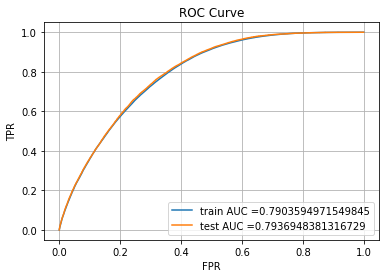

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, lr_train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lr_test_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [ ]:
print("AUC Score on Test set : {}".format(lr_test_score))

AUC Score on Test set : 0.7936948381316729


# XGBoost

In [ ]:
classifier = xgb.XGBClassifier()
classifier.fit(X_train,y_train)
xgboost_pred_train = classifier.predict_proba(X_train)[:,1]
xgboost_pred_test = classifier.predict_proba(X_test)[:,1]

xgb_test_auc = roc_auc_score(y_test,xgboost_pred_test)

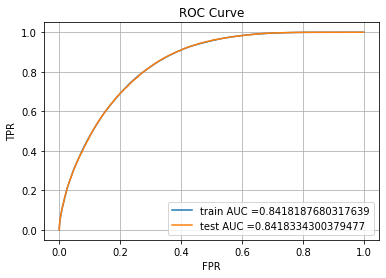

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, xgboost_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, xgboost_pred_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [ ]:
print("AUC Score on Test set : {}".format(xgb_test_auc))

AUC Score on Test set : 0.8418334300379477


# LGBM:

In [ ]:
lgbm = ltb.LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [ ]:
sig_clf = CalibratedClassifierCV(lgbm, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier())

In [ ]:
lgbm_train_predict = sig_clf.predict_proba(X_train)[:,1]
lgbm_test_predict = sig_clf.predict_proba(X_test)[:,1]

lgbm_test_score = roc_auc_score(y_test,lgbm_test_predict)

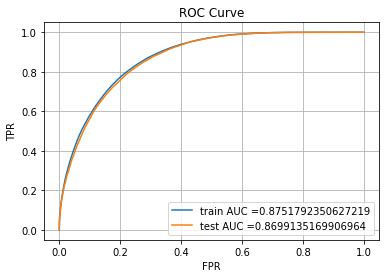

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, lgbm_train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lgbm_test_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [ ]:
print("AUC Score on Test set : {}".format(lgbm_test_score))

AUC Score on Test set : 0.8699135169906964


# Modeling after balancing classes

# Logistic Regression:

In [12]:
lr = LogisticRegression(C = 0.01, class_weight = weights)
lr.fit(X_train, y_train) # now fitting on entire train data

LogisticRegression(C=0.01,
                   class_weight={0: 0.7926443125395184, 1: 1.3542793735868017})

In [13]:
lr_train_predict = lr.predict_proba(X_train)[:,1]
lr_test_predict = lr.predict_proba(X_test)[:,1]

lr_train_score = roc_auc_score(y_train,lr_train_predict)
lr_test_score = roc_auc_score(y_test,lr_test_predict)

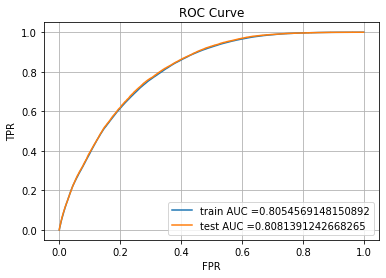

In [15]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, lr_train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lr_test_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [14]:
print("AUC Score on Test set : {}".format(lr_test_score))

AUC Score on Test set : 0.8081391242668265


# XGBoost:

In [16]:
classifier = xgb.XGBClassifier(class_weight = weights)
classifier.fit(X_train,y_train)
xgboost_pred_train = classifier.predict_proba(X_train)[:,1]
xgboost_pred_test = classifier.predict_proba(X_test)[:,1]

xgb_test_auc = roc_auc_score(y_test,xgboost_pred_test)

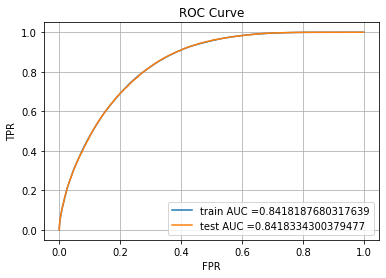

In [17]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, xgboost_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, xgboost_pred_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [18]:
print("AUC Score on Test set : {}".format(xgb_test_auc))

AUC Score on Test set : 0.8418334300379477


# LGBM:

In [19]:
lgbm = ltb.LGBMClassifier(class_weight = weights)
lgbm.fit(X_train,y_train)

LGBMClassifier(class_weight={0: 0.7926443125395184, 1: 1.3542793735868017})

In [24]:
lgbm_train_predict = lgbm.predict_proba(X_train)[:,1]
lgbm_test_predict = lgbm.predict_proba(X_test)[:,1]

lgbm_test_score = roc_auc_score(y_test,lgbm_test_predict)

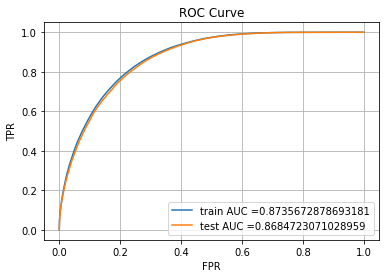

In [25]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, lgbm_train_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lgbm_test_predict)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [22]:
print("AUC Score on Test set : {}".format(lgbm_test_score))

AUC Score on Test set : 0.8684723071028959


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","Train-AUC", "Test-AUC"]
x.add_row(["Logistic Regression",0.79 ,0.79])
x.add_row(["XGBoost",0.8418,0.8418])
x.add_row(["LGBM",0.875,0.869])
(x)

Model,Train-AUC,Test-AUC
Logistic Regression,0.79,0.79
XGBoost,0.8418,0.8418
LGBM,0.875,0.869
